# Enthalpy Quantification

> [Return to examples.md](examples.md)

This example shows how to perform a simple enthalpy calculation on a DSC curve.

## Load Experiment Data
Here we load the experiment data from a JSON file specific to a DSC kinetics experiment.

In [1]:
from tadatakit.classes import Experiment
import matplotlib.pyplot as plt
import numpy as np

experiment = Experiment.from_json("files/DSC kinetics/10Cmin.json")
df = experiment.get_dataframe()

## Utility Functions
Define functions to find the closest values in a data series (and their indices) and to integrate the area under the peak.

In [2]:
def find_closest_values(series, target):
    """Find the closest value in a series to the target value"""
    idx = (np.abs(series - target)).argmin()
    return idx, series[idx]

def calculate_enthalpy(data, start_idx, end_idx):
    """Integrate the area under the curve"""
    peak = data.iloc[start_idx:end_idx]
    x = peak["Time / min"] * 60
    y = peak["Heat Flow (Normalized) / W/g"]
    baseline = np.interp(x, [x.iloc[0], x.iloc[-1]], [y.iloc[0], y.iloc[-1]])
    return np.trapz(y - baseline, x)

## Analyze Data
Find the temperature indices for the integration limits and perform the integration and calculate the enthalpy by adjusting for heating rate.

In [3]:
min_idx, min_temp = find_closest_values(df["Temperature / °C"], 45)
max_idx, max_temp = find_closest_values(df["Temperature / °C"], 230)

enthalpy = calculate_enthalpy(df, min_idx, max_idx)

print(f"Enthalpy = {enthalpy:.2f} J/g")

Enthalpy = 414.04 J/g


## Plot Results
Visualize the original heat flow data and the integrated area used to calculate the enthalpy.

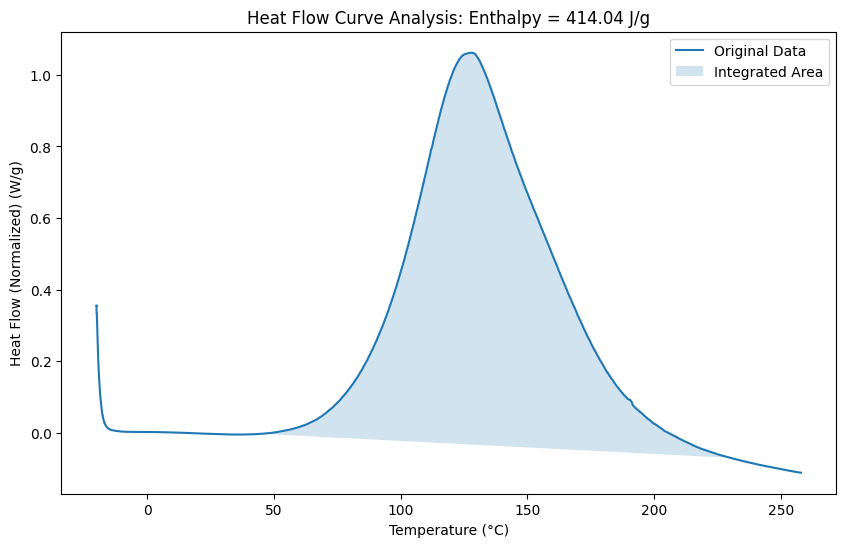

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Temperature / °C"], df["Heat Flow (Normalized) / W/g"], label="Original Data"
)
plt.fill_between(
    df["Temperature / °C"].iloc[min_idx:max_idx],
    df["Heat Flow (Normalized) / W/g"].iloc[min_idx:max_idx],
    np.interp(
        df["Temperature / °C"].iloc[min_idx:max_idx],
        [min_temp, max_temp],
        df["Heat Flow (Normalized) / W/g"].iloc[[min_idx, max_idx]],
    ),
    alpha=0.2,
    label="Integrated Area",
)
plt.xlabel("Temperature (°C)")
plt.ylabel("Heat Flow (Normalized) (W/g)")
plt.title(f"Heat Flow Curve Analysis: Enthalpy = {enthalpy:.2f} J/g")
plt.legend()
plt.show()